#Advanced Deep Learning (2022- 2023)
##Assignment-2

Student: Ufuk Cem Birbiri

In [1]:
import torch
import torchvision  #To be able to access standard datasets more easily
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np  # To plot and display stuff
import torch.optim as optim # Where the optimization modules are
%matplotlib inline

# Using torchvision we can conveniently load some datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
# Extract tensor of data and labels for both the training and the test set
x, y = trainset.data.float(), trainset.targets
x_test, y_test = testset.data.float(), testset.targets
x.shape, y.shape, x_test.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

In [3]:
# Transform labels to one_hot encoding
y_one_hot = torch.nn.functional.one_hot(y.to(torch.int64), num_classes=10).float()
y_test_one_hot = torch.nn.functional.one_hot(y_test.to(torch.int64), num_classes=10).float()

#Exercise-1

Modify the code of mnist-assignment.py to train the chosen network using SGD with
minibatches of different sizes (starting from size 1). Discuss how the SGD method with various
minibatch sizes compares in terms of speed of convergence and final accuracy on test set with
GD.

In [4]:

# Now let us define the neural network we are using
net = torch.nn.Sequential(
    torch.nn.Linear(28*28, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 100),
    torch.nn.Sigmoid(),
    torch.nn.Linear(100, 10),
)

# Now we define the optimizer and the loss function
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1)

In [ ]:
import time

n_epochs = 100
print("n_epochs = ", n_epochs)
batch_size = 1 #We change the epoch number here.
print("batch_size = ", batch_size)

train_losses = []
test_losses = []
times = []

for epoch in range(n_epochs):
    start_epoch = time.time()
    # X is a torch Variable
    permutation = torch.randperm(x.size()[0])

    train_loss_temp = 0
    test_loss_temp = 0
    for i in range(0, x.size()[0], batch_size):
        optimizer.zero_grad()

        indices = permutation[i : i+batch_size] #shape = [batch_size]
        
        batch_x = x[indices]  #shape = [batch_size, 28, 28]
        batch_y = y_one_hot[indices] #shape = [batch_size, 10]
        
        inputs = torch.flatten(batch_x, start_dim=1, end_dim=2) #shape=[batch_size, 784]
        outputs = net(inputs) #shape = [batch_size, 10]    

        #Define the empirical risk
        Risk = loss(outputs, batch_y )
        #Save the training loss:
        train_loss_temp += Risk.item()

        #Save the test loss:
        x_test_flatten = torch.flatten(x_test, start_dim=1, end_dim=2) #shape=[10000, 784]
        y_pred_test = net(x_test_flatten) #shape = [10000, 10]
        Risk_test = loss(y_pred_test, y_test)
        
        test_loss_temp += Risk_test.item()

        #Make the backward step (1 line instruction)
        Risk.backward()

        #Upadte the parameters (1 line instruction)
        optimizer.step()

    
    train_losses.append(train_loss_temp)
    test_losses.append(test_loss_temp)
    with torch.no_grad():
      print("epoch=", epoch, "   Risk train = ", train_loss_temp)
    
    end_epoch = time.time()
    elapsed = end_epoch - start_epoch
    print(elapsed)
    times.append(elapsed)

sum_time = sum(times)
print("sum_time =", sum_time)

n_epochs =  100
batch_size =  1
epoch= 0    Risk train =  223938.05880898237
6303.699912309647
epoch= 1    Risk train =  219856.91940948367
6541.3144109249115
epoch= 2    Risk train =  219244.98778911307
6369.176593780518


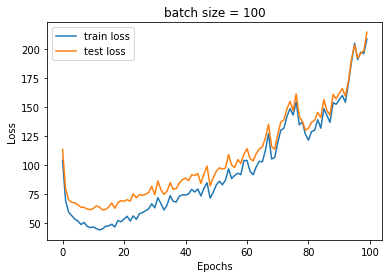

In [68]:
from matplotlib import pyplot as plt
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("batch size = 100")
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import accuracy_score

# Compute the final accuracy on test set
pred_test = net(torch.flatten(x_test, start_dim=1, end_dim=2))
pred_test = pred_test.detach().numpy()

acc_test = accuracy_score(y_test, np.argmax(pred_test, axis=1))

print("Final accuracy on test", acc_test)

Final accuracy on test 0.8622


In [72]:
from sklearn.metrics import accuracy_score

pred_train = net(torch.flatten(x, start_dim=1, end_dim=2))
pred_train = pred_train.detach().numpy()

acc_train = accuracy_score(y, np.argmax(pred_train, axis=1))

print("Final accuracy on train", acc_train)

Final accuracy on train 0.8641666666666666


#Exercise-2

Initialize all the weights and all biases to a common value (for instance 0). Try to train
the network either with GD or SGD. What happens? Why?

In [88]:

# Now let us define the neural network we are using
net = torch.nn.Sequential(
    torch.nn.Linear(28*28, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 100),
    torch.nn.Sigmoid(),
    torch.nn.Linear(100, 10),
)

# Now we define the optimizer and the loss function
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1)

In [89]:
#Initialize the network's weigths and bias to zero:
def init_weights(module):
  if isinstance(module, torch.nn.Linear):
    torch.nn.init.constant_(module.weight, 0)
    if module.bias is not None:
      module.bias.data.zero_()
    module.bias.data.fill_(0)
    torch.nn.init.constant_(module.bias, 0)

net.apply(init_weights)

Sequential(
  (0): Linear(in_features=784, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=10, bias=True)
)

Let's check that the weights are biases are initialized to zero or not:

In [90]:
print( net[0].weight)
print( net[0].bias,"\n")
print()
print( net[2].weight)
print( net[2].bias)
print()
print( net[4].weight)
print( net[4].bias)

Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

Ok, they are initialized as zero. Let's run the network:

In [91]:
#Build the network
import time

n_epochs = 100
print("n_epochs = ", n_epochs)
batch_size = 10000 #We change the epoch number here.
print("batch_size = ", batch_size)

train_losses = []
test_losses = []
times = []

for epoch in range(n_epochs):
    start_epoch = time.time()
    # X is a torch Variable
    permutation = torch.randperm(x.size()[0])

    train_loss_temp = 0
    test_loss_temp = 0
    for i in range(0, x.size()[0], batch_size):
        optimizer.zero_grad()
        
        indices = permutation[i : i+batch_size] #shape = [batch_size]
        
        batch_x = x[indices]  #shape = [batch_size, 28, 28]
        batch_y = y_one_hot[indices] #shape = [batch_size, 10]
        
        inputs = torch.flatten(batch_x, start_dim=1, end_dim=2) #shape=[batch_size, 784]
        outputs = net(inputs) #shape = [batch_size, 10]    

        #Define the empirical risk
        Risk = loss(outputs, batch_y )
        #Save the training loss:
        train_loss_temp += Risk.item()

        #Save the test loss:
        x_test_flatten = torch.flatten(x_test, start_dim=1, end_dim=2) #shape=[10000, 784]
        y_pred_test = net(x_test_flatten) #shape = [10000, 10]
        Risk_test = loss(y_pred_test, y_test)
        
        test_loss_temp += Risk_test.item()

        #Make the backward step (1 line instruction)
        Risk.backward()

        #Upadte the parameters (1 line instruction)
        optimizer.step()

    
    train_losses.append(train_loss_temp)
    test_losses.append(test_loss_temp)
    with torch.no_grad():
      print("epoch=", epoch, "   Risk train = ", train_loss_temp)
    
    end_epoch = time.time()
    elapsed = end_epoch - start_epoch
    times.append(elapsed)

sum_time = sum(times)
print("sum_time =", sum_time)

n_epochs =  100
batch_size =  10000
epoch= 0    Risk train =  13.810812950134277
epoch= 1    Risk train =  13.8078453540802
epoch= 2    Risk train =  13.807703018188477
epoch= 3    Risk train =  13.807300329208374
epoch= 4    Risk train =  13.807468175888062
epoch= 5    Risk train =  13.807505369186401
epoch= 6    Risk train =  13.807483911514282
epoch= 7    Risk train =  13.807597637176514
epoch= 8    Risk train =  13.807602405548096
epoch= 9    Risk train =  13.807602167129517
epoch= 10    Risk train =  13.807511806488037
epoch= 11    Risk train =  13.807416439056396
epoch= 12    Risk train =  13.807730436325073
epoch= 13    Risk train =  13.807512998580933
epoch= 14    Risk train =  13.807636737823486
epoch= 15    Risk train =  13.807410955429077
epoch= 16    Risk train =  13.807512760162354
epoch= 17    Risk train =  13.807353019714355
epoch= 18    Risk train =  13.807684898376465
epoch= 19    Risk train =  13.807480335235596
epoch= 20    Risk train =  13.807442426681519
epoch= 21 

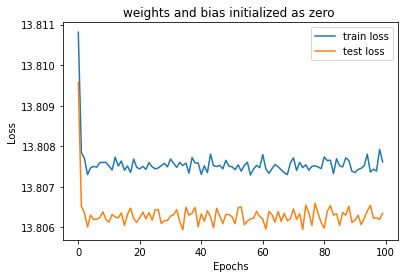

In [95]:
from matplotlib import pyplot as plt
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("weights and bias initialized as zero ")
plt.legend()
plt.show()

In [93]:
from sklearn.metrics import accuracy_score

# Compute the final accuracy on test set
pred_test = net(torch.flatten(x_test, start_dim=1, end_dim=2))
pred_test = pred_test.detach().numpy()

acc_test = accuracy_score(y_test, np.argmax(pred_test, axis=1))

print("Final accuracy on test", acc_test)

Final accuracy on test 0.1135


In [94]:
from sklearn.metrics import accuracy_score

pred_train = net(torch.flatten(x, start_dim=1, end_dim=2))
pred_train = pred_train.detach().numpy()

acc_train = accuracy_score(y, np.argmax(pred_train, axis=1))

print("Final accuracy on train", acc_train)

Final accuracy on train 0.11236666666666667


#Exercise-3

Let's sort the x and y, according to class labels(y) in ascending order i.e. order the MNIST dataset in order to have first all the “zeros”, then all the “ones”, then all the “twos” and so on:

In [4]:
#First, we will take a permutation of all the 60000 images to shuffle them randomly:

permutation = torch.randperm(x.size()[0])
print("permutation.shape = ",permutation.shape)
indices = permutation #shape = [60000]
permut_x = x[indices]  #shape = [60000, 28, 28]
permut_y = y[indices] #shape = [60000]

print(permut_y.shape, permut_x.shape)

permutation.shape =  torch.Size([60000])
torch.Size([60000]) torch.Size([60000, 28, 28])


In [5]:
#Now, we sort the class labels(y) in ascending order:
idx   = np.argsort(permut_y)
#We rearrange the x and y accroding to indeces of new sorted labels:
y_new = np.array(permut_y)[idx]
x_new = np.array(permut_x)[idx]

#Convert them to torch tensors:
x_new_torch = torch.from_numpy(x_new)
y_new_torch = torch.from_numpy(y_new)
print(x_new_torch.shape, y_new_torch.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])


In [6]:
y_one_hot_new = torch.nn.functional.one_hot(y_new_torch, num_classes=10).float()
y_one_hot_new.shape

torch.Size([60000, 10])

In [7]:
y_one_hot_new

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [9]:

# Now let us define the neural network we are using
net = torch.nn.Sequential(
    torch.nn.Linear(28*28, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 100),
    torch.nn.Sigmoid(),
    torch.nn.Linear(100, 10),
)

# Now we define the optimizer and the loss function
loss = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.0001)

In [10]:
import time

train_losses = []
test_losses = []
times = []

epoch=0
is_begining = 1

start_epoch = time.time()
    
train_loss_temp = 0
#test_loss_temp = 0
for i in range(0, 60000 * 100):
  

  optimizer.zero_grad()

  #Take the modulo of 60000
  i_current = i % 60000
  batch_x = x_new_torch[i_current]  #shape = [1, 28, 28]
  batch_y = y_one_hot_new[i_current] #shape = [1, 10]

  inputs = torch.flatten(batch_x, start_dim=0, end_dim=1) #shape=[1, 784]
  outputs = net(inputs) #shape = [1, 10]

  #Define the empirical risk
  Risk = loss(outputs, batch_y )
  #Save the training loss:
  train_loss_temp += Risk.item()

  #Save the test loss:
  #x_test_flatten = torch.flatten(x_test, start_dim=1, end_dim=2) #shape=[10000, 784]
  #y_pred_test = net(x_test_flatten) #shape = [10000, 10]
  #Risk_test = loss(y_pred_test, y_test)
        
  #test_loss_temp += Risk_test.item()

  #Make the backward step (1 line instruction)
  Risk.backward()

  #Upadte the parameters (1 line instruction)
  optimizer.step()
  
  

  with torch.no_grad():
    if i_current == 0 & is_begining == 0:
      train_losses.append(train_loss_temp)
      #test_losses.append(test_loss_temp)
      
      
      epoch +=1
      print("epoch=", epoch, "   Risk train = ", train_loss_temp)
      #test_loss_temp=0
      train_loss_temp=0
  
  is_begining = 0


end_epoch = time.time()
elapsed = end_epoch - start_epoch

print("sum_time =", elapsed)







epoch= 1    Risk train =  1.9747848510742188
epoch= 2    Risk train =  50894.83209144324
epoch= 3    Risk train =  40381.3078892082
epoch= 4    Risk train =  30395.21406905353
epoch= 5    Risk train =  22481.047263797373
epoch= 6    Risk train =  16509.96112939343
epoch= 7    Risk train =  13432.889819905162
epoch= 8    Risk train =  12531.78449484706
epoch= 9    Risk train =  10847.455036830157
epoch= 10    Risk train =  9446.891519419849
epoch= 11    Risk train =  8921.127047481015
epoch= 12    Risk train =  8502.725046169013
epoch= 13    Risk train =  8120.51422396116
epoch= 14    Risk train =  7750.658567832783
epoch= 15    Risk train =  8236.368038843386
epoch= 16    Risk train =  8488.723258406855
epoch= 17    Risk train =  9326.013053953648
epoch= 18    Risk train =  9564.969646711834
epoch= 19    Risk train =  9829.581696334295
epoch= 20    Risk train =  9268.331192416139
epoch= 21    Risk train =  9402.104732577689
epoch= 22    Risk train =  8967.174925494939
epoch= 23    Risk

In [11]:
train2 = train_losses

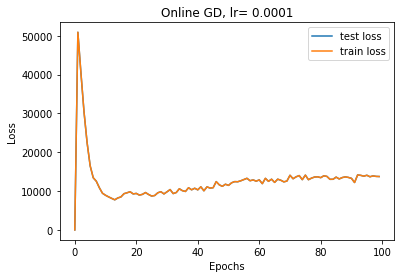

In [13]:

from matplotlib import pyplot as plt
plt.plot(train_losses, label="test loss")
plt.plot(train_losses, label="train loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Online GD, lr= 0.0001")
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

# Compute the final accuracy on test set
pred_test = net(torch.flatten(x_test, start_dim=1, end_dim=2))
pred_test = pred_test.detach().numpy()

acc_test = accuracy_score(y_test, np.argmax(pred_test, axis=1))

print("Final accuracy on test", acc_test)

Final accuracy on test 0.7424


In [15]:
from sklearn.metrics import accuracy_score

pred_train = net(torch.flatten(x, start_dim=1, end_dim=2))
pred_train = pred_train.detach().numpy()

acc_train = accuracy_score(y, np.argmax(pred_train, axis=1))

print("Final accuracy on train", acc_train)

Final accuracy on train 0.7420666666666667


#Exercise-4

 Set up an experiment on MNIST to compare SGD and ADAM in terms of
-  Sensibility to the learning rate 
-  Speed of convergence.
-  Final accuracy on test set.

I will do experiments by using both Adam and SGD optimizations. I will use a batch size of 1000 to make the training faster( batch size of 1 is very very slow so I don't prefer to use it). I will try different learning rates in both optimizers and show the test accuracy. I will keep the other parameters fixed: number of epochs = 100, number of hidden layers=2, number of neurons in hidden layers=300 and 100 respectively, batch size=1000.

In [4]:

# Now let us define the neural network we are using
net = torch.nn.Sequential(
    torch.nn.Linear(28*28, 300),
    torch.nn.ReLU(),
    torch.nn.Linear(300, 100),
    torch.nn.Sigmoid(),
    torch.nn.Linear(100, 10),
)

# Now we define the optimizer and the loss function
loss = torch.nn.CrossEntropyLoss()


We can select the optimizer here:

In [ ]:
#optimizer = optim.SGD(net.parameters(), lr = 1)
optimizer = optim.Adam(net.parameters(), lr = .001)

In [5]:
import time

n_epochs = 100
print("n_epochs = ", n_epochs)
batch_size = 1000 #We change the epoch number here.
print("batch_size = ", batch_size)

train_losses = []
test_losses = []
times = []

for epoch in range(n_epochs):
    start_epoch = time.time()
    # X is a torch Variable
    permutation = torch.randperm(x.size()[0])

    train_loss_temp = 0
    test_loss_temp = 0
    for i in range(0, x.size()[0], batch_size):
        optimizer.zero_grad()

        indices = permutation[i : i+batch_size] #shape = [batch_size]
        
        batch_x = x[indices]  #shape = [batch_size, 28, 28]
        batch_y = y_one_hot[indices] #shape = [batch_size, 10]
        
        inputs = torch.flatten(batch_x, start_dim=1, end_dim=2) #shape=[batch_size, 784]
        outputs = net(inputs) #shape = [batch_size, 10]    

        #Define the empirical risk
        Risk = loss(outputs, batch_y )
        #Save the training loss:
        train_loss_temp += Risk.item()

        #Save the test loss:
        x_test_flatten = torch.flatten(x_test, start_dim=1, end_dim=2) #shape=[10000, 784]
        y_pred_test = net(x_test_flatten) #shape = [10000, 10]
        Risk_test = loss(y_pred_test, y_test)
        
        test_loss_temp += Risk_test.item()

        #Make the backward step (1 line instruction)
        Risk.backward()

        #Upadte the parameters (1 line instruction)
        optimizer.step()

    
    train_losses.append(train_loss_temp)
    test_losses.append(test_loss_temp)
    with torch.no_grad():
      print("epoch=", epoch, "   Risk train = ", train_loss_temp)
    
    end_epoch = time.time()
    elapsed = end_epoch - start_epoch
    times.append(elapsed)

sum_time = sum(times)
print("sum_time =", sum_time)

n_epochs =  100
batch_size =  1000
epoch= 0    Risk train =  50.951696932315826
epoch= 1    Risk train =  15.328673467040062
epoch= 2    Risk train =  8.704951897263527
epoch= 3    Risk train =  6.0608091577887535
epoch= 4    Risk train =  4.351857740432024
epoch= 5    Risk train =  3.411055739969015
epoch= 6    Risk train =  2.7016474790871143
epoch= 7    Risk train =  2.198097014799714
epoch= 8    Risk train =  1.862985884770751
epoch= 9    Risk train =  1.3463176852092147
epoch= 10    Risk train =  1.0145810395479202
epoch= 11    Risk train =  0.8268701327033341
epoch= 12    Risk train =  0.606918606441468
epoch= 13    Risk train =  0.4725432158447802
epoch= 14    Risk train =  0.3613713134545833
epoch= 15    Risk train =  0.30898047611117363
epoch= 16    Risk train =  0.2781551524531096
epoch= 17    Risk train =  0.2468529073521495
epoch= 18    Risk train =  0.22533799649681896
epoch= 19    Risk train =  0.22233103215694427
epoch= 20    Risk train =  0.28767997375689447
epoch= 21  

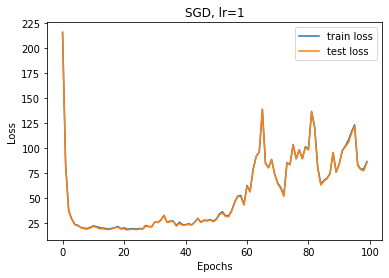

In [63]:
from matplotlib import pyplot as plt
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("SGD, lr=1")
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import accuracy_score

# Compute the final accuracy on test set
pred_test = net(torch.flatten(x_test, start_dim=1, end_dim=2))
pred_test = pred_test.detach().numpy()

acc_test = accuracy_score(y_test, np.argmax(pred_test, axis=1))

print("Final accuracy on test", acc_test)

Final accuracy on test 0.552


In [38]:
from sklearn.metrics import accuracy_score

pred_train = net(torch.flatten(x, start_dim=1, end_dim=2))
pred_train = pred_train.detach().numpy()

acc_train = accuracy_score(y, np.argmax(pred_train, axis=1))

print("Final accuracy on train", acc_train)

Final accuracy on train 0.8356
